<a href="https://colab.research.google.com/github/jhonatanparada499/supervised-learning-notes/blob/main/recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [35]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import metrics, svm, datasets
from sklearn.model_selection import train_test_split

# Import image processing library 2026-02-10
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

# Import os to handle local files
import os

## Data Transformation Example

[[ 0.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  1.  2.  5.  3.  0.  0.  1.]
 [ 0.  4.  4.  6. 11.  4.  7.  3.]
 [ 0.  4.  2.  1.  8.  9. 16. 11.]
 [ 0.  4.  2.  0.  3.  4.  1.  2.]
 [ 0.  5.  5.  0.  3.  4.  0.  1.]
 [ 0.  3. 10.  2.  5.  2.  0.  1.]
 [ 0.  1.  6.  7.  3.  0.  0.  1.]]


Text(0.5, 1.0, 'Grayscale')

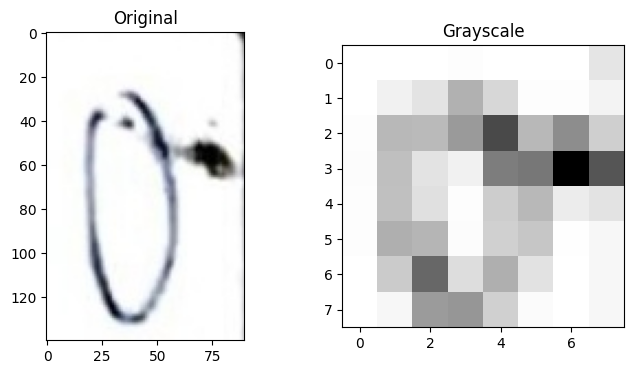

In [8]:
IMG_PATH = "archive/0/Zero_full (1).jpg"
img = imread(IMG_PATH) # converts .jpg img into numerical data
gray_img = rgb2gray(img) # converst img to black and white
resized_img = resize(gray_img, (8, 8), anti_aliasing=True) # makes img be 8x8 pixels

# Data Transformation
inverted_img = 1.0 - resized_img
final_img = inverted_img * 16

if inverted_img.max() > 0:
    final_img = (inverted_img / inverted_img.max()) * 16
else:
    final_img = inverted_img
final_img = np.round(final_img, 0) # 0 means the number of decimals

print(final_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(resized_img, cmap=plt.cm.gray) # gray_r means inverted gray
ax[1].set_title("Grayscale")

## Processing Multiple Pictures

In [36]:
PATH = "archive/"

# production
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# testing
# categories = ["0", "1"]

images = []
labels = []

# Iterates through every directory in archive/
for index, category in enumerate(categories):
    for file in os.listdir(os.path.join(PATH, category)):
        img_path = os.path.join(PATH, category, file)
        img = imread(img_path)
        gray_img = rgb2gray(img)
        resized_img = resize(gray_img, (8, 8), anti_aliasing=True)

        # Apply Data Transformation
        inverted_img = 1.0 - resized_img
        final_img = inverted_img * 16
        
        if inverted_img.max() > 0:
            final_img = (inverted_img / inverted_img.max()) * 16
        else:
            final_img = inverted_img
        final_img = np.round(final_img, 0) # 0 means the number of decimals

        # Populate Data(after flattening) and Label values
        images.append(final_img)

        # Task: get
        labels.append(index)

# print(images[0])
# print()
# print(labels[0])

## Classification & Training Data After Shuffle

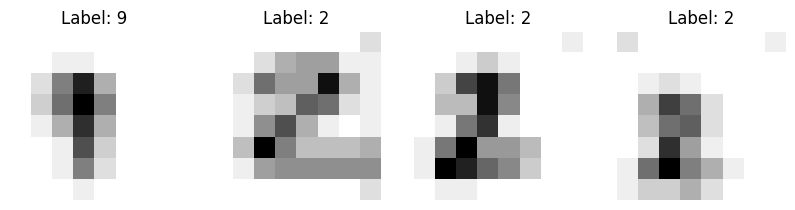

In [37]:
# flatten the images
n_samples = len(images)
# data = images.reshape((n_samples, -1)) # returns error bc reshape is not a memeber of built-in list
data = np.array([img.ravel() for img in images])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.5, shuffle=True # Originally was False
)

# Training images with labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    # image = image.reshape(8, 8) # returns error bc reshape is not a member of built-in list (only works with scikit-learn dataset)
    image.shape = (8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

## Training & Prediction (Kaggle Dataset)

In [38]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

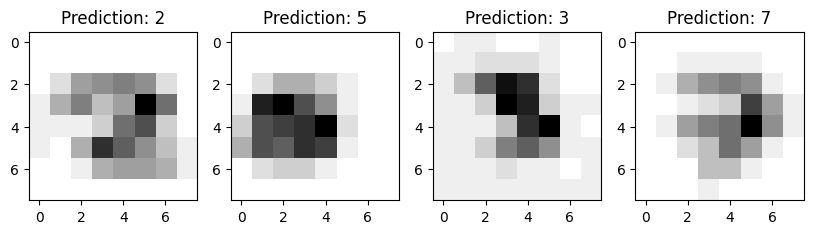

In [39]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    # ax.set_axis_off()
    #image = image.reshape(8, 8) # returns error in my version
    image.shape = (8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Predicting Digits Dataset from Scikit-learn

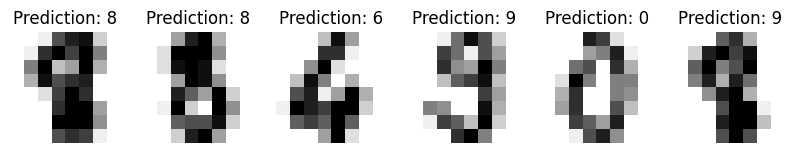

In [40]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data2 = digits.images.reshape((n_samples, -1))

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    data2,
    digits.target,
    test_size=0.5,
    shuffle=False,
)

predicted2 = clf.predict(X_test2)

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test2, predicted2):
    ax.set_axis_off()
    #image = image.reshape(8, 8) # returns error in my version
    image.shape = (8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Report

In [43]:
print(
    f"Classification report for Kaggle dataset:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

print(
    f"Classification report for Scikit-learn dataset:\n"
    f"{metrics.classification_report(y_test2, predicted2)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1107
           1       0.85      0.96      0.90      1105
           2       0.93      0.87      0.90      1152
           3       0.86      0.80      0.82      1120
           4       0.82      0.85      0.84      1080
           5       0.89      0.82      0.85      1063
           6       0.84      0.91      0.87      1055
           7       0.85      0.89      0.87      1045
           8       0.82      0.78      0.80      1073
           9       0.84      0.79      0.81       978

    accuracy                           0.86     10778
   macro avg       0.86      0.86      0.86     10778
weighted avg       0.86      0.86      0.86     10778


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        88
           1       0.

## Confusion Matrix

Confusion matrix:
[[1021    7    1    4   30    6   19    1   11    7]
 [   4 1058    3    1    3    2    6    5    0   23]
 [  13   17  998   12   18    4   30   29   25    6]
 [   9   18   19  891   14   21    3   56   45   44]
 [  12   28    2    6  920    3   45   13   18   33]
 [  20   11    5   29   19  875   42    9   38   15]
 [  19   25    6    0   18    5  963    1   17    1]
 [   3   32   23   11   15    0   10  931   10   10]
 [  12   29   11   44   23   55   27   23  837   12]
 [   9   27    2   44   58   16    5   24   23  770]]


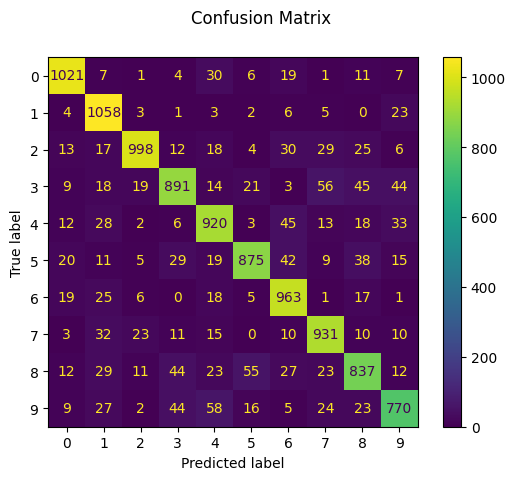

In [42]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()